In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

In [2]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []

    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i:i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [3]:
df = pd.read_csv("../data_dir/train_AMAZON_0619.csv")
df["Medium"] = df[["High", "Low"]].mean(axis = 1)
feature_Df = df[["High", "Low", "Open", "Medium"]]
target_Df = df["Close"]
train_Feature, train_Label = make_dataset(feature_Df, target_Df)

In [4]:
feature = 4
timesteps = 5
cell_size = 16
#learning_rate = 0.1
batch_size = 32
epochs = 50


input_shape = (timesteps, feature)
model = models.Sequential()
model.add(layers.LSTM(cell_size, input_shape = input_shape,activation="relu", return_sequences = False))
#model.add(layers.Dropout(0.2))
#model.add(layers.LSTM(cell_size))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
optimizer = K.optimizers.Adam() #(lr = learning_rate)
loss_func = K.losses.mse
acc = K.metrics.RootMeanSquaredError
model.compile(optimizer = optimizer, loss = loss_func, metrics = [K.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1344      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(train_Feature, train_Label, epochs = epochs, batch_size = batch_size)

Epoch 1/50
188/188 [==============================] - 16s 44ms/step - loss: 7538.2579 - root_mean_squared_error: 72.2333
Epoch 2/50
188/188 [==============================] - 8s 45ms/step - loss: 287.0446 - root_mean_squared_error: 16.8768
Epoch 3/50
188/188 [==============================] - 8s 44ms/step - loss: 304.9860 - root_mean_squared_error: 17.4574
Epoch 4/50
188/188 [==============================] - 8s 44ms/step - loss: 282.4801 - root_mean_squared_error: 16.7816
Epoch 5/50
188/188 [==============================] - 8s 44ms/step - loss: 345.6376 - root_mean_squared_error: 18.5776
Epoch 6/50
188/188 [==============================] - 8s 44ms/step - loss: 292.6371 - root_mean_squared_error: 17.0965
Epoch 7/50
188/188 [==============================] - 8s 44ms/step - loss: 290.5386 - root_mean_squared_error: 16.9894
Epoch 8/50
188/188 [==============================] - 8s 44ms/step - loss: 302.6493 - root_mean_squared_error: 17.3914
Epoch 9/50
188/188 [==========================

In [6]:
test_df = pd.read_csv("../data_dir/test_AMAZON_0619.csv")
test_df["Medium"] = test_df[["High", "Low"]].mean(axis = 1)
feature_test = test_df[["High", "Low", "Open", "Medium"]]
target_test = test_df["Close"]
test_Feature, test_Label = make_dataset(feature_test, target_test)


In [7]:
pred = model.predict(test_Feature)

In [8]:
pred

array([[3210.9272],
       [3245.128 ],
       [3280.391 ],
       [3316.0833],
       [3335.6218],
       [3344.7466],
       [3354.6367],
       [3363.1567],
       [3351.2683],
       [3332.8381],
       [3337.9778],
       [3323.7212],
       [3329.3013],
       [3353.1086],
       [3373.9678],
       [3406.7021],
       [3445.33  ],
       [3450.62  ],
       [3412.8228],
       [3393.2383],
       [3341.6438],
       [3314.353 ],
       [3274.6316],
       [3228.175 ],
       [3206.0127],
       [3186.9585],
       [3171.7144],
       [3182.2483],
       [3209.0662],
       [3194.4397],
       [3211.7727],
       [3216.463 ],
       [3208.7585],
       [3214.0156],
       [3226.566 ],
       [3221.7532],
       [3218.6362],
       [3221.4922],
       [3209.097 ],
       [3193.7485],
       [3188.9285],
       [3178.4238],
       [3189.7285],
       [3204.2234],
       [3226.122 ],
       [3258.232 ],
       [3283.6196],
       [3311.9558],
       [3335.5017],
       [3365.5615]],

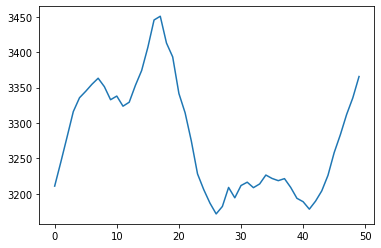

In [9]:
plt.plot(range(len(pred)), pred)

In [10]:
model.save("../models/my_model_AMAZON")

INFO:tensorflow:Assets written to: ../models/my_model_AMAZON/assets
